In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

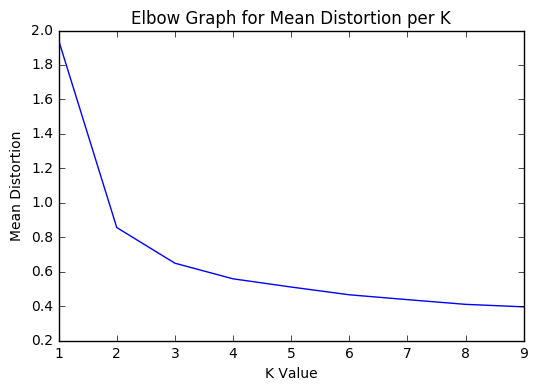

In [5]:
    find_k(np.matrix(X), range(1,10),1)

In [7]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(df)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [8]:
df['labels'] = kmeans_model.labels_

In [9]:
df[df['labels'] == 0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0
56,6.3,3.3,4.7,1.6,0
58,6.6,2.9,4.6,1.3,0
59,5.2,2.7,3.9,1.4,0
60,5.0,2.0,3.5,1.0,0


In [10]:
df[df['labels'] == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


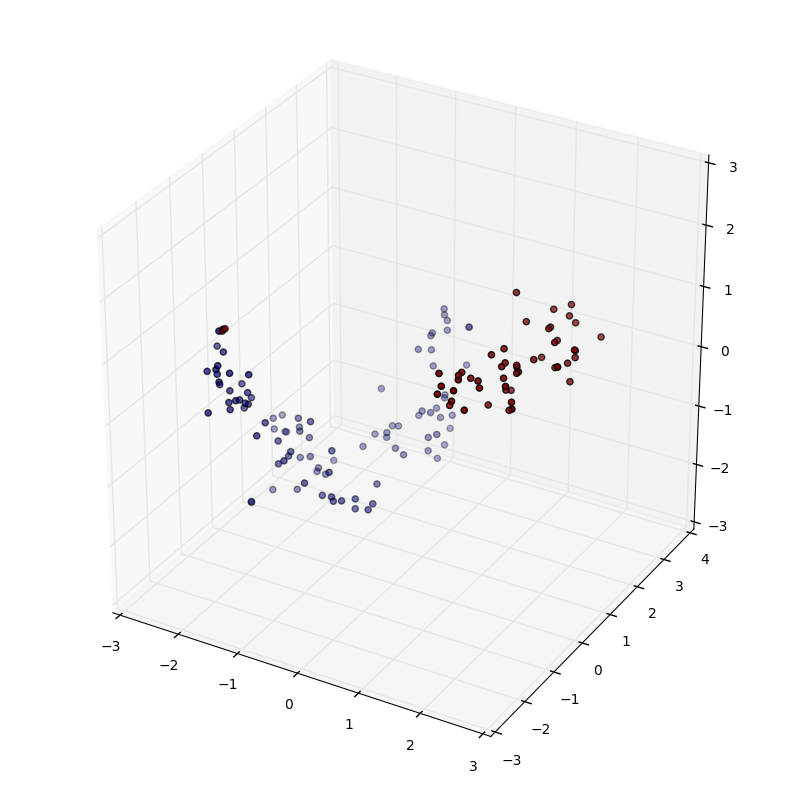

In [11]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

In [12]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [13]:
df['labels'] = kmeans_model.labels_

In [14]:
df[df['labels'] == 0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0
56,6.3,3.3,4.7,1.6,0
57,4.9,2.4,3.3,1.0,0
58,6.6,2.9,4.6,1.3,0
59,5.2,2.7,3.9,1.4,0
60,5.0,2.0,3.5,1.0,0


In [15]:
df[df['labels'] == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [16]:
df[df['labels'] == 2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
52,6.9,3.1,4.9,1.5,2
77,6.7,3.0,5.0,1.7,2
100,6.3,3.3,6.0,2.5,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


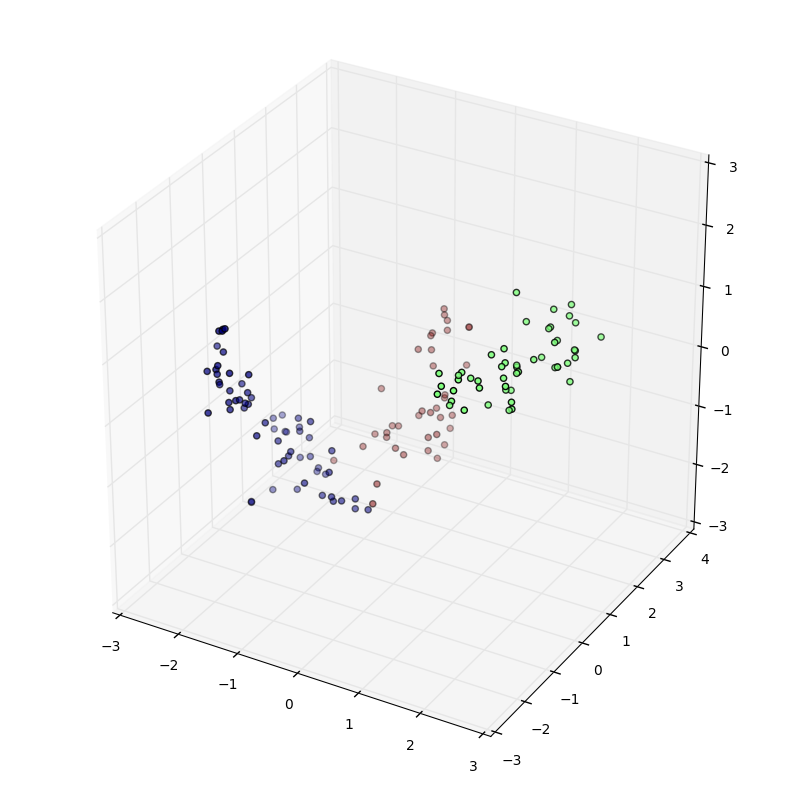

In [17]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)

k=3gives us more a more well defined result than k=2. It has been clustered into three numbers